## Shivam Yadav

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score

import pandas_profiling

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


## Uploading Data

In [ ]:
#uploading the music
music_df = pd.read_csv("music_genre.csv")

## EDA / Feature Processing

In [ ]:
music_df.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [ ]:
music_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

In [ ]:
# converting tempo to a numeric type
music_df = music_df[pd.to_numeric(music_df['tempo'], errors='coerce').notnull()]

In [ ]:
music_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45020 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       45020 non-null  float64
 1   artist_name       45020 non-null  object 
 2   track_name        45020 non-null  object 
 3   popularity        45020 non-null  float64
 4   acousticness      45020 non-null  float64
 5   danceability      45020 non-null  float64
 6   duration_ms       45020 non-null  float64
 7   energy            45020 non-null  float64
 8   instrumentalness  45020 non-null  float64
 9   key               45020 non-null  object 
 10  liveness          45020 non-null  float64
 11  loudness          45020 non-null  float64
 12  mode              45020 non-null  object 
 13  speechiness       45020 non-null  float64
 14  tempo             45020 non-null  object 
 15  obtained_date     45020 non-null  object 
 16  valence           45020 non-null  float6

In [ ]:
music_df['tempo'] = music_df['tempo'].astype(float)

In [ ]:
music_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45020 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       45020 non-null  float64
 1   artist_name       45020 non-null  object 
 2   track_name        45020 non-null  object 
 3   popularity        45020 non-null  float64
 4   acousticness      45020 non-null  float64
 5   danceability      45020 non-null  float64
 6   duration_ms       45020 non-null  float64
 7   energy            45020 non-null  float64
 8   instrumentalness  45020 non-null  float64
 9   key               45020 non-null  object 
 10  liveness          45020 non-null  float64
 11  loudness          45020 non-null  float64
 12  mode              45020 non-null  object 
 13  speechiness       45020 non-null  float64
 14  tempo             45020 non-null  float64
 15  obtained_date     45020 non-null  object 
 16  valence           45020 non-null  float6

Information above tells us that there is no need to fill any empty cells (i.e. there are no missing values) after converting tempo to a numerical value. 

In [ ]:
music_df.groupby(['music_genre']).agg({"instance_id": "count"})

,instance_id
music_genre,
Alternative,4495
Anime,4497
Blues,4470
Classical,4500
Country,4486
Electronic,4466
Hip-Hop,4520
Jazz,4521
Rap,4504


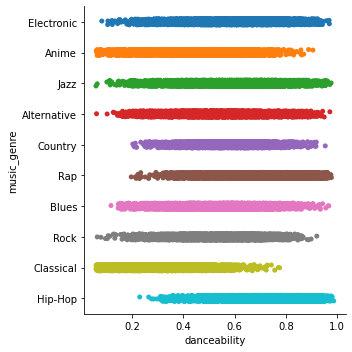

In [ ]:
# plotting danceability with music genre to see the spread/variability of the continuous random variable against the category
sns.catplot(x="danceability", y="music_genre", data=music_df)

Looking to see the range of danceability with respect to genre. Electronic music has some of the highest ranges (very diverse/variable). 

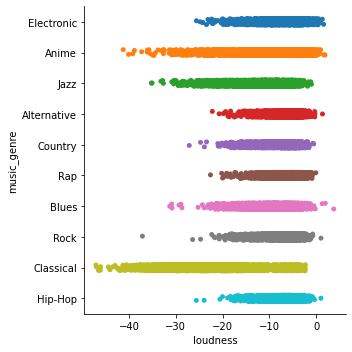

In [ ]:
sns.catplot(x="loudness", y="music_genre", data=music_df)

Loudness could be a useful predictor

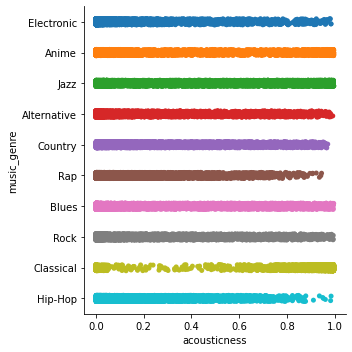

In [ ]:
sns.catplot(x="acousticness", y="music_genre", data=music_df)

After measuring acousticness with respect to music genre, it doesn't seem like this variable would help in the classification of music_genre (the acousticness is so variable among all genres). 

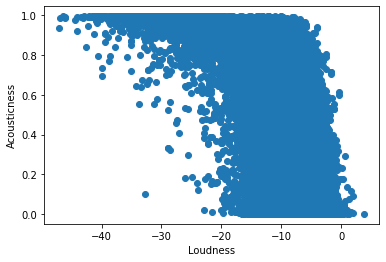

In [ ]:
# We can compare acousticness with loudness to see if there seems to be a trend between the two. 
# This can possibly help us determine whether the acousticness of a song is a confocunding variable with respect to loudness
# When regressed on music genres

plt.scatter("loudness", "acousticness", data = music_df)
plt.xlabel('Loudness')
plt.ylabel('Acousticness')
plt.show()

From this plot there doesn't seem to be a linear relationship between the two variables. Acousticness might not be a valuable predictor consequently from our dataset. 

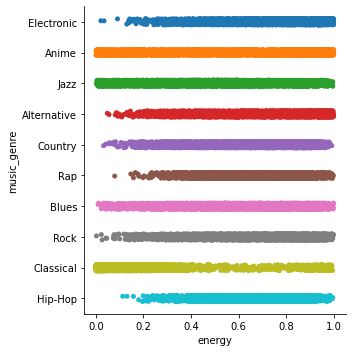

In [ ]:
sns.catplot(x="energy", y="music_genre", data=music_df)

Electronic seems to have an minimum energy threshold around 0.2 (probably meaning that most electronic music is at least somewhat energetic). 

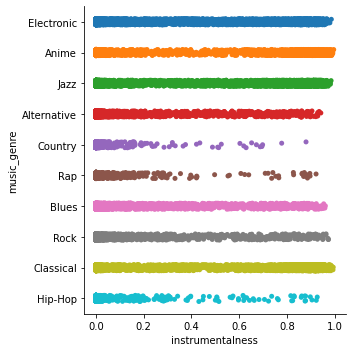

In [ ]:
sns.catplot(x="instrumentalness", y="music_genre", data=music_df)

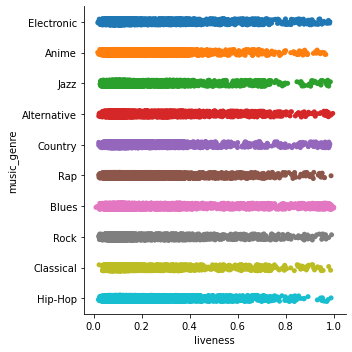

In [ ]:
sns.catplot(x="liveness", y="music_genre", data=music_df)

Liveness doesn't seem that helpful from this catplot. 

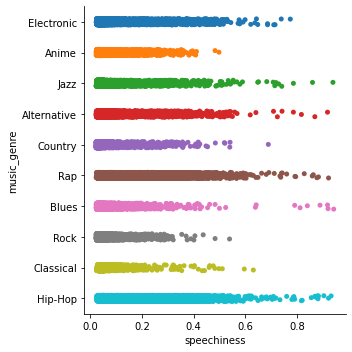

In [ ]:
sns.catplot(x="speechiness", y="music_genre", data=music_df)

With respect to electronic music, there seem to be less songs with greater speechiness values. Could be a useful predictor in the overall model. 

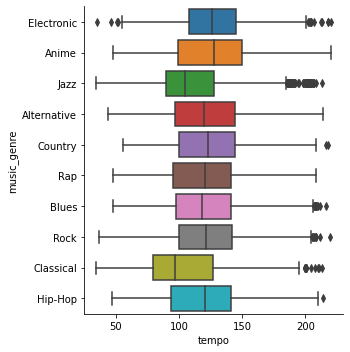

In [ ]:
sns.catplot(x="tempo", y="music_genre", kind="box", data=music_df)

In [ ]:
temp_series = pd.unique(music_df['key'])
print(len(temp_series))

12


This 12 number above tells us there are 12 keys. This is relatively low cardinality, so we can proceed to one-hot encode the key in our dataset. 

In [ ]:
music_df = pd.get_dummies(columns=['key', 'mode'], data = music_df)

In [ ]:
music_df.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,obtained_date,valence,music_genre,key_A,key_A#,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,0.115,-5.201,0.0748,100.889,4-Apr,0.759,Electronic,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,0.124,-7.043,0.0300,115.002,4-Apr,0.531,Electronic,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,0.534,-4.617,0.0345,127.994,4-Apr,0.333,Electronic,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,0.157,-4.498,0.2390,128.014,4-Apr,0.270,Electronic,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,0.157,-6.266,0.0413,145.036,4-Apr,0.323,Electronic,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [ ]:
music_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45020 entries, 0 to 50004
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       45020 non-null  float64
 1   artist_name       45020 non-null  object 
 2   track_name        45020 non-null  object 
 3   popularity        45020 non-null  float64
 4   acousticness      45020 non-null  float64
 5   danceability      45020 non-null  float64
 6   duration_ms       45020 non-null  float64
 7   energy            45020 non-null  float64
 8   instrumentalness  45020 non-null  float64
 9   liveness          45020 non-null  float64
 10  loudness          45020 non-null  float64
 11  speechiness       45020 non-null  float64
 12  tempo             45020 non-null  float64
 13  obtained_date     45020 non-null  object 
 14  valence           45020 non-null  float64
 15  music_genre       45020 non-null  object 
 16  key_A             45020 non-null  uint8 

##Modeling

In [ ]:
# drop unecessary/relatively low impact variables as decided from EDA
X = music_df.drop(['instance_id', 'artist_name', 'track_name', 'obtained_date', 'acousticness', 'liveness', 'music_genre'], axis=1)
y = music_df['music_genre']

In [ ]:
cols_to_scale = list(X)
cols_to_scale.sort()

In [ ]:
# Performing Z-Score for normalizing the variables
sc = StandardScaler()
sc.fit(X[cols_to_scale])
X_scaled = pd.DataFrame(sc.transform(X[cols_to_scale]), columns=X.columns)

In [ ]:
X.describe()

,popularity,danceability,duration_ms,energy,instrumentalness,loudness,speechiness,tempo,valence,key_A,key_A#,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor
count,45020.000000,45020.000000,4.502000e+04,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000
mean,44.263327,0.558532,2.211695e+05,0.599553,0.181843,-9.137016,0.093783,119.952961,0.456394,0.097379,0.066704,0.075478,0.110684,0.108974,0.104820,0.031697,0.075056,0.086184,0.061750,0.113949,0.067326,0.641359,0.358641
std,15.553972,0.178858,1.276884e+05,0.264510,0.325847,6.156400,0.101469,30.641701,0.247161,0.296476,0.249511,0.264163,0.313744,0.311610,0.306325,0.175194,0.263484,0.280639,0.240704,0.317753,0.250588,0.479607,0.479607
min,0.000000,0.059600,-1.000000e+00,0.000792,0.000000,-47.046000,0.022300,34.347000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,0.442000,1.747230e+05,0.432000,0.000000,-10.860000,0.036100,94.941500,0.257000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,0.568000,2.194385e+05,0.642000,0.000159,-7.284000,0.048900,119.879000,0.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,56.000000,0.687000,2.686400e+05,0.815250,0.154000,-5.177000,0.098800,140.471250,0.648000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,99.000000,0.986000,4.497994e+06,0.999000,0.996000,3.744000,0.942000,220.276000,0.992000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Validate the output
X_scaled.describe()

,popularity,danceability,duration_ms,energy,instrumentalness,loudness,speechiness,tempo,valence,key_A,key_A#,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor
count,4.502000e+04,4.502000e+04,4.502000e+04,4.502000e+04,4.502000e+04,4.502000e+04,4.502000e+04,4.502000e+04,4.502000e+04,4.502000e+04,4.502000e+04,4.502000e+04,4.502000e+04,4.502000e+04,4.502000e+04,4.502000e+04,4.502000e+04,4.502000e+04,4.502000e+04,4.502000e+04,4.502000e+04,4.502000e+04,4.502000e+04
mean,2.287079e-16,8.762673e-16,4.442668e-16,-2.113009e-14,5.805337e-15,-6.048474e-15,-4.817843e-15,-7.172628e-16,6.072858e-15,1.017704e-15,3.104793e-15,1.425426e-15,-7.847309e-15,2.860588e-15,3.380813e-15,1.977055e-15,2.727420e-16,3.400982e-15,-3.400982e-15,-4.627968e-15,9.440230e-15,-5.774985e-16,2.008019e-16
std,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00
min,-2.789572e+00,-1.732130e+00,-2.263691e+00,-5.580676e-01,-3.284580e-01,-2.673407e-01,-2.857263e-01,-3.527887e-01,-3.497162e-01,-3.421898e-01,-1.809271e-01,-2.848613e-01,-3.071028e-01,-2.565432e-01,-3.586135e-01,-2.686737e-01,-6.157723e+00,-1.337276e+00,-7.477889e-01,-2.845821e+00,-7.044925e-01,-2.793804e+00,-1.846570e+00
25%,-6.515422e-01,-3.637528e-01,-6.334556e-01,-5.580676e-01,-3.284580e-01,-2.673407e-01,-2.857263e-01,-3.527887e-01,-3.497162e-01,-3.421898e-01,-1.809271e-01,-2.848613e-01,-3.071028e-01,-2.565432e-01,-3.586135e-01,-2.686737e-01,-2.798719e-01,-1.337276e+00,-7.477889e-01,-6.598598e-01,-5.684884e-01,-8.162647e-01,-8.067480e-01
50%,5.293428e-02,-1.355658e-02,1.604754e-01,-5.575796e-01,-3.284580e-01,-2.673407e-01,-2.857263e-01,-3.527887e-01,-3.497162e-01,-3.421898e-01,-1.809271e-01,-2.848613e-01,-3.071028e-01,-2.565432e-01,-3.586135e-01,-2.686737e-01,3.009934e-01,7.477889e-01,-7.477889e-01,4.736287e-02,-4.423398e-01,-2.413750e-03,-3.396229e-02
75%,7.182732e-01,3.717724e-01,8.154686e-01,-8.544756e-02,-3.284580e-01,-2.673407e-01,-2.857263e-01,-3.527887e-01,-3.497162e-01,-3.421898e-01,-1.809271e-01,-2.848613e-01,-3.071028e-01,-2.565432e-01,-3.586135e-01,-2.686737e-01,6.432427e-01,7.477889e-01,1.337276e+00,7.545856e-01,4.944282e-02,6.696272e-01,7.752374e-01
max,2.390007e+00,3.349460e+01,1.510158e+00,2.498618e+00,3.044530e+00,3.740545e+00,3.499853e+00,2.834558e+00,2.859461e+00,2.922355e+00,5.527088e+00,3.510480e+00,3.256239e+00,3.897980e+00,2.788517e+00,3.721987e+00,2.092320e+00,7.477889e-01,1.337276e+00,3.519183e+00,8.359485e+00,3.274105e+00,2.167061e+00


In [ ]:
# splitting data to train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=25, stratify=y, train_size=0.8)

In [ ]:
# XGBoost Model for genre type
mlp_model = MLPClassifier(
    hidden_layer_sizes=(150,100,10),
    activation='relu',
    solver='adam',
    alpha=0.0005,
    learning_rate='adaptive',
    learning_rate_init= 0.001,
    max_iter=2000,
    random_state=2020,
    verbose=True
)

In [ ]:
# fitting initial model (hyperparameters above)
mlp_model.fit(X_scaled, y)

Iteration 1, loss = 1.66701918
Iteration 2, loss = 1.26319057
Iteration 3, loss = 1.21676779
Iteration 4, loss = 1.18934980
Iteration 5, loss = 1.16912088
Iteration 6, loss = 1.15426845
Iteration 7, loss = 1.14111976
Iteration 8, loss = 1.12850272
Iteration 9, loss = 1.11881155
Iteration 10, loss = 1.10797593
Iteration 11, loss = 1.10056428
Iteration 12, loss = 1.09400881
Iteration 13, loss = 1.08808965
Iteration 14, loss = 1.08383522
Iteration 15, loss = 1.07608677
Iteration 16, loss = 1.07213490
Iteration 17, loss = 1.06761393
Iteration 18, loss = 1.06259620
Iteration 19, loss = 1.06027155
Iteration 20, loss = 1.05605062
Iteration 21, loss = 1.05188391
Iteration 22, loss = 1.04841172
Iteration 23, loss = 1.04540460
Iteration 24, loss = 1.04287004
Iteration 25, loss = 1.03972706
Iteration 26, loss = 1.03785067
Iteration 27, loss = 1.03291412
Iteration 28, loss = 1.03168542
Iteration 29, loss = 1.02794377
Iteration 30, loss = 1.02408612
Iteration 31, loss = 1.02178696
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0005, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(150, 100, 10), learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=2000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=2020, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=True,
              warm_start=False)

In [ ]:
y_pred = mlp_model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_pred, y_test)

In [ ]:
cm

array([[454,   7,  30,  14,  41,  41,  15,  20,  16,  43],
       [  8, 808,  52,  28,   6,  36,   0,   9,   1,   4],
       [ 23,  10, 579,  14,  12,  44,   0,  43,   1,   7],
       [  4,  40,  13, 829,   2,   7,   2,  44,   0,   3],
       [128,  17,  74,   4, 661,  26,   6,  39,   8,  62],
       [ 21,   8,  17,   1,   5, 603,   5,  57,   2,   2],
       [ 53,   0,   0,   0,  17,  16, 589,  12, 427,  16],
       [ 37,   3,  94,   9,  21,  90,   9, 663,   3,  13],
       [ 35,   1,   0,   0,   7,   4, 252,   0, 375,  40],
       [136,   6,  35,   1, 125,  26,  26,  17,  68, 722]])

In [ ]:
# accuracy function to measure accuracy of the model
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

In [ ]:
print("Accuracy of MLPClassifier : ", accuracy(cm))

Accuracy of MLPClassifier :  0.697800977343403


In [ ]:
# another model with a different set of hyperparameters
mlp_model_2 = MLPClassifier(
    hidden_layer_sizes=(150,100,10),
    activation='relu',
    solver='adam',
    alpha=0.005,
    learning_rate='adaptive',
    learning_rate_init= 0.001,
    max_iter=2000,
    random_state=25,
    verbose=True
)

In [ ]:
mlp_model_2.fit(X_scaled, y)

Iteration 1, loss = 1.71674989
Iteration 2, loss = 1.28680470
Iteration 3, loss = 1.22574053
Iteration 4, loss = 1.19820528
Iteration 5, loss = 1.17985817
Iteration 6, loss = 1.16305647
Iteration 7, loss = 1.15191670
Iteration 8, loss = 1.14056702
Iteration 9, loss = 1.13117949
Iteration 10, loss = 1.12151856
Iteration 11, loss = 1.11350909
Iteration 12, loss = 1.10583133
Iteration 13, loss = 1.09895812
Iteration 14, loss = 1.09075659
Iteration 15, loss = 1.08316141
Iteration 16, loss = 1.07973992
Iteration 17, loss = 1.07378716
Iteration 18, loss = 1.06870620
Iteration 19, loss = 1.06201923
Iteration 20, loss = 1.06034090
Iteration 21, loss = 1.05468682
Iteration 22, loss = 1.05096404
Iteration 23, loss = 1.04783169
Iteration 24, loss = 1.04341682
Iteration 25, loss = 1.03985813
Iteration 26, loss = 1.03731086
Iteration 27, loss = 1.03460464
Iteration 28, loss = 1.03007901
Iteration 29, loss = 1.02959824
Iteration 30, loss = 1.02399978
Iteration 31, loss = 1.02414593
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.005, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(150, 100, 10), learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=2000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=25, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=True,
              warm_start=False)

In [ ]:
y_pred = mlp_model_2.predict(X_test)

In [ ]:
cm2 = confusion_matrix(y_pred, y_test)

In [ ]:
print("Accuracy of MLPClassifier with lower alpha: ", accuracy(cm2))

Accuracy of MLPClassifier with lower alpha:  0.7064637938693914


From our results, we get an ~71% accuracy on classifying the labels accurately. I tried 2 different models with a minor change in the hyperparameters, both of which resulted in a majority accuracy (as per the confusion matrix results). This leads me to believe that my model / approach is fairly accurate in predicting the labels of the songs. I think that more changes can be made/assessed to see whether other excluded predictors (i.e. acousticness) would be helpful in classifying the genre of the songs, but doing so is computationally expensive (i.e. running a model for each additional of a predictor). Other classical classification techniques such as multinomial logistic regression or random forest/ensemble classifiers may also be used to create models with similar accuracy. The MLP classifier uses a neural network approach with backpropogation and continues to modifies itself, which is why I opted for this approach. Another area of research could be determining the optimal number of hidden layers for a more accurate result. Altogether, I would say that the models have moderately decent accuracy given the large amount of data present, and having two models with similar scores tells me that they are precise. 

##THANK YOU!